<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/DS_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 1

**Name:** Rishi Kaul

**UID:** 2018130019

**Objective**: To carry out linear regression (including multiple regression) and build a regression model using Python Platform

**Outcomes:**
1. To learn how to define, fit, and use a model in Python

2. To interpret the results

**Part - A**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import accuracy_score
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Datasets/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Dropping the categorical feature from the dataframe for further analysis

In [ ]:
data.drop(['car name'],axis=1,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**Summary of the dataset**

In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Data Preprocessing**

1. Checking for null values in the dataset

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

* There are **no null values** in our dataset.
But the **horsepower** feature in our dataframe contains '?' which need to be removed from the dataframe , so we will **drop the rows** in the dataframe where horsepower is equal to '?'.

In [ ]:
data = data[data.horsepower != '?']

In [ ]:
# Checking for null values after dropping the rows
'?' in data

False

In [ ]:
data.shape

(392, 8)

After dropping the rows containing horsepower as '?', now we are left with 392 rows.

Here , I am checking the correlation of all the features of the dataset w.r.t miles-per-gallon i.e.**'mpg'** and arranging the values in ascending order.

In [ ]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

**Heatmap of correlation matrix**

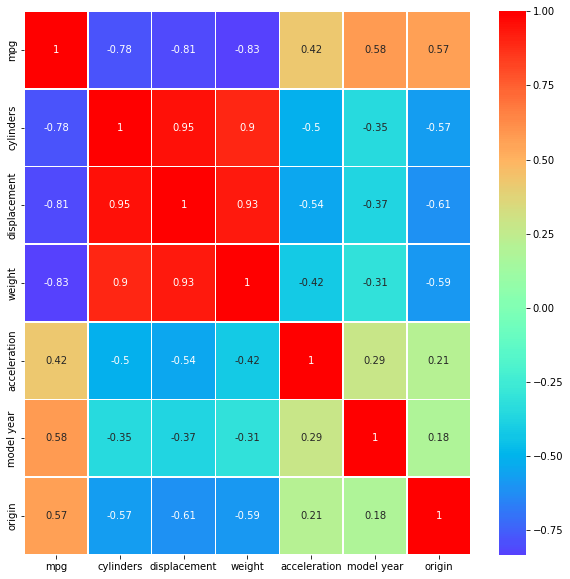

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


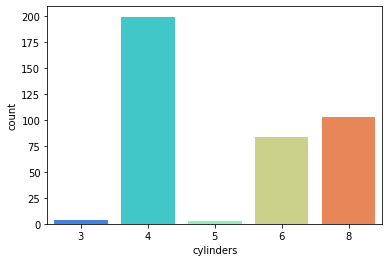

In [ ]:
sns.countplot(data.cylinders,data=data,palette = "rainbow")
plt.show()

From the above above plot we can visualize that there are **maximum number of 4 cylinder** vehicles.
Around **98% of the vehicles are either of 4, 6, 8 cylinders** and only small percent of vehicles are either  of 3 and 5 cylinders.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


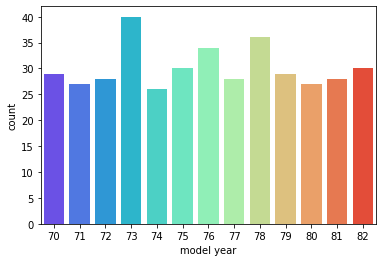

In [ ]:
sns.countplot(data['model year'],palette = "rainbow")
plt.show()

**Maximum number of** vehicles are of the **year 1973** and **minumum number** of the **year 1974**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


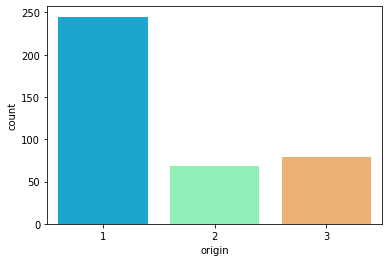

In [ ]:
sns.countplot(data.origin,palette = "rainbow")
plt.show()

Most of the vehicles are from region 1 as compared to the other two regions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


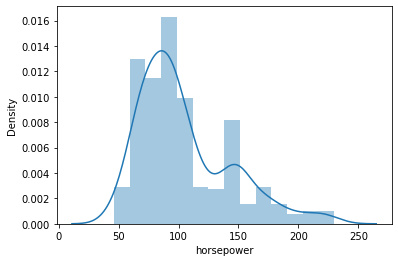

In [ ]:
data['horsepower'] = pd.to_numeric(data['horsepower'])
sns.distplot(data['horsepower'])
plt.show()

1. Horsepower rates the engine performance of cars
2. From the above plot we can see the distribution of the horsepower of the vehicles.
3. We can visualize that most of the vehicles have around **75-110 horsepower** and only few vehicles have horsepoer above 200.

**Engine displacement** is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


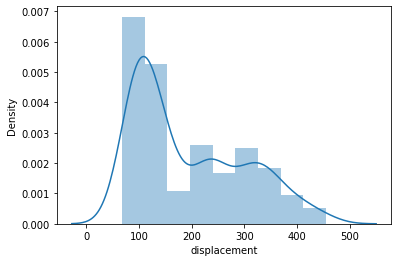

In [ ]:
sns.distplot(data.displacement,rug=False)
plt.show()

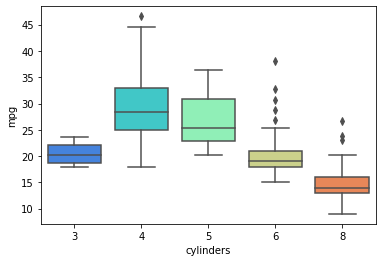

In [ ]:
## multivariate analysis
sns.boxplot(y='mpg',x='cylinders',data=data,palette = "rainbow")
plt.show()

We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.
- From the above result we can carry out the inference that for most of the people **mileage(mpg)** is one of the major factor while buying a vehicle.

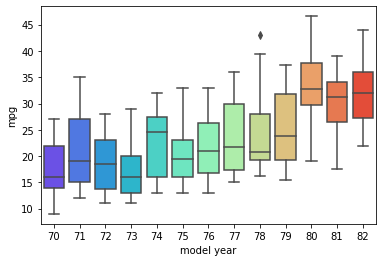

In [ ]:
sns.boxplot(y='mpg',x='model year',data=data,palette = "rainbow")
plt.show()

With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


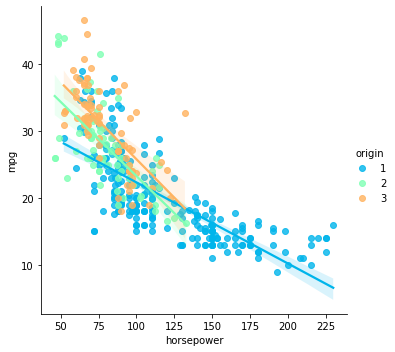

In [ ]:
plot = sns.lmplot('horsepower','mpg',data=data,hue='origin',palette = "rainbow")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


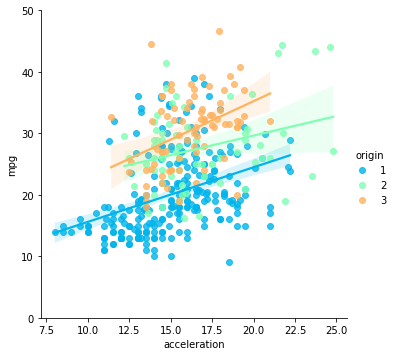

In [ ]:
plot = sns.lmplot('acceleration','mpg',data=data,hue='origin',palette = "rainbow")
plot.set(ylim = (0,50))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


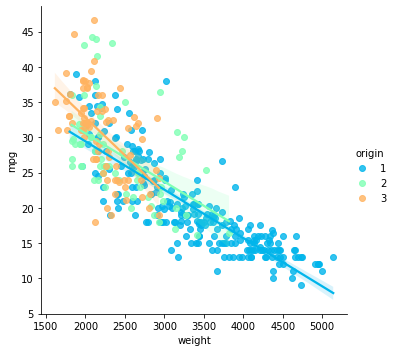

In [ ]:
plot = sns.lmplot('weight','mpg',data=data,hue='origin',palette = "rainbow")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


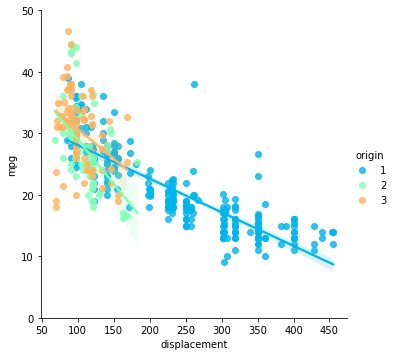

In [ ]:
plot = sns.lmplot('displacement','mpg',data=data,hue='origin',palette = "rainbow")
plot.set(ylim = (0,50))
plt.show()

**Modelling**

In [ ]:
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

Splitting the dataset into training and test set.

**1. Multivariate Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)
print(regressor.score(X_test,Y_test))

0.8191428142279117


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, Y_pred)
print("Linear Regression MAE:", mae)
mse = mean_squared_error(Y_test, Y_pred)
print("Linear Regression MSE:", mse)

Linear Regression MAE: 8.715288028603469
Linear Regression MSE: 114.25266849058323


**Part 1B**

In [ ]:
# reading csv
data = pd.read_csv('horse.csv')

In [ ]:
# printing head of dataset
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
# printing shapre or dimensions of data
data.shape

(299, 28)

In [ ]:
# printing the column datatypes to get an understanding of categorical and numerical columns
data.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [ ]:
# checking missing values present in the dataset
data.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
# columns having more than 50 % of null values
delete_cols = ['nasogastric_reflux_ph', 'abdomo_appearance',
       'abdomo_protein']

In [ ]:
# dropping above mentioned columns 
df = data.drop(delete_cols, axis = 1)

**EDA**

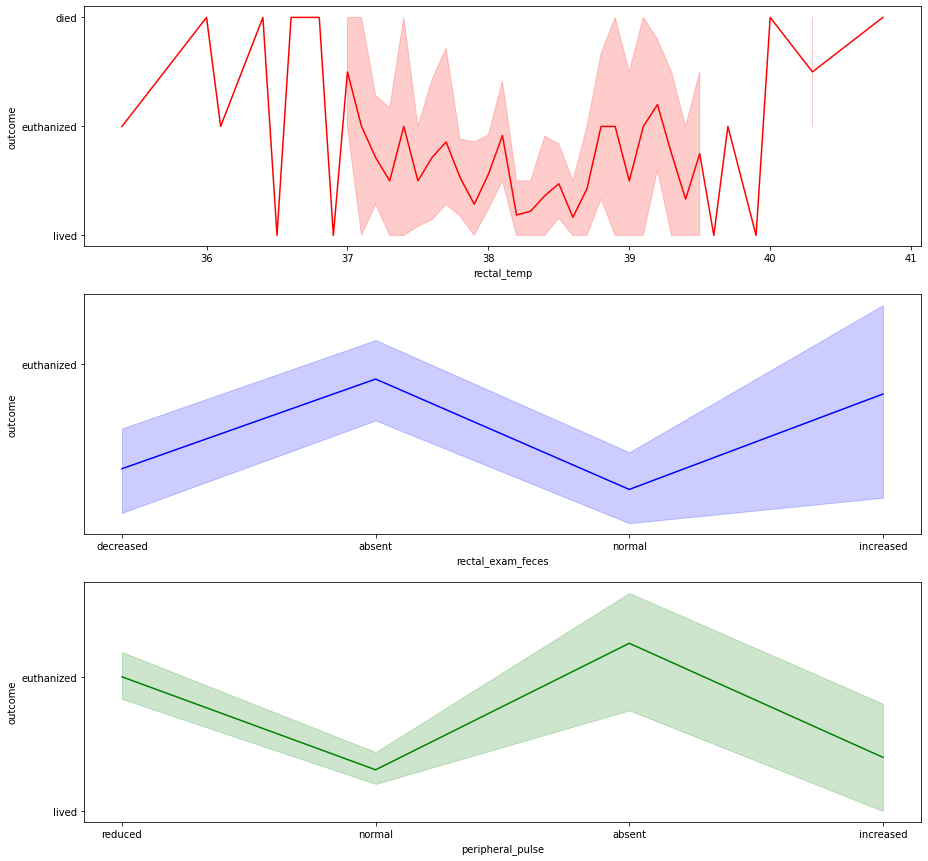

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(15,15))
sns.lineplot(x=df['rectal_temp'],y=df.outcome,ax=ax[0],color='r') #We visualize 3 features with different levels of correlation with outcome
sns.lineplot(x=df['rectal_exam_feces'],y=df.outcome,ax=ax[1],color='b')
sns.lineplot(x=df['peripheral_pulse'],y=df.outcome,ax=ax[2],color='g')

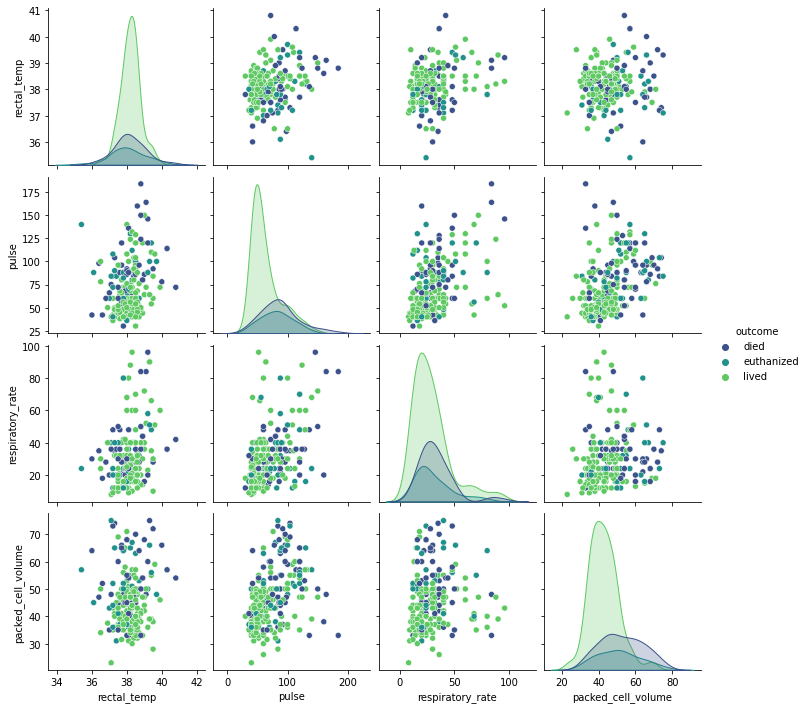

In [ ]:
#We can see a clear correlation for example with high packed cell volume meaning no survival (the same with pulse not with resprate)
chosen_cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'outcome']
sns.pairplot(df[chosen_cols], hue='outcome', palette = 'viridis'); 

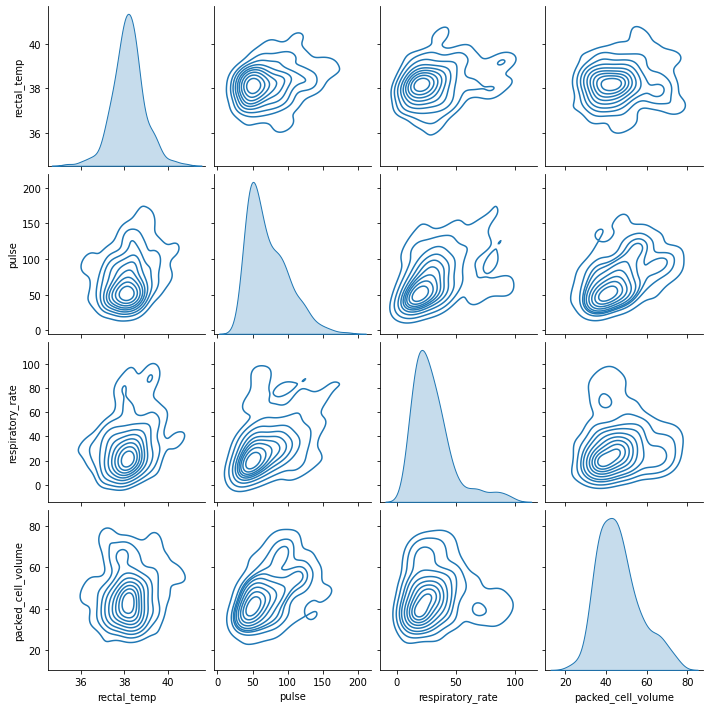

In [ ]:
sns.pairplot(df[chosen_cols], kind="kde"); #This graph helps us show where most values are concentrated in some numerical features

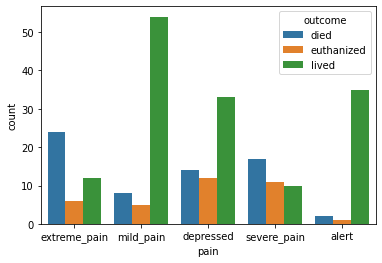

In [ ]:
sns.countplot(data=df, x='pain', hue = 'outcome') #We can see how the bigger the pain, the less the chance of survival

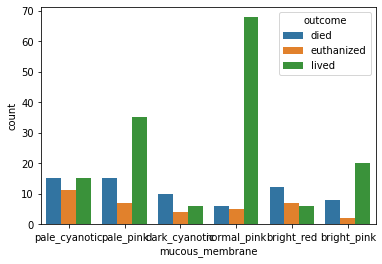

In [ ]:
sns.countplot(data=df, x='mucous_membrane', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

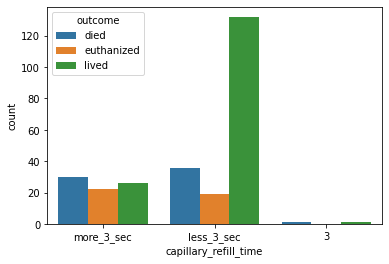

In [ ]:
sns.countplot(data=df, x='capillary_refill_time', hue = 'outcome') #We can see how the worse the circulation-> less the chance of survival

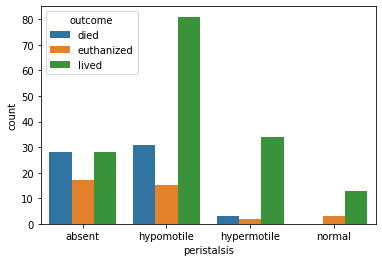

In [ ]:
sns.countplot(data=df, x='peristalsis', hue = 'outcome') #the lesser the activity on the horses gut the lesser the chance of survival

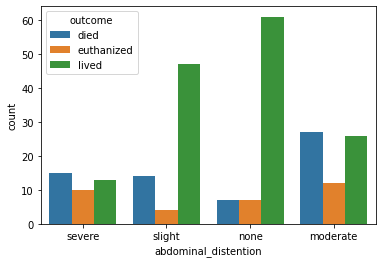

In [ ]:
sns.countplot(data=df, x='abdominal_distention', hue = 'outcome') #the more distended the abdomen the lesser the chance of survival (it means more pain like the documentation says)

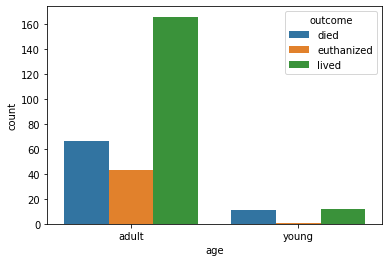

In [ ]:
sns.countplot(data=df, x='age', hue = 'outcome') #surprisingly, the age of the horse doesn't have a big impact on the outcome of the surgery
#however younger horses tend to survive less

In [ ]:
# for numerical columns filling the misssing values with their mean
for column in df.columns:
  if df[column].dtype == 'int64' or df[column].dtype == 'float64':
    df[column].fillna(df[column].mean(),inplace=True)

In [ ]:
# for categorical columns filling the missing values with their most frequent value
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].value_counts().index[0],inplace=True)

In [ ]:
# checking missing values after cleaning the dataset
df.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [ ]:
# for encoding the data, instantializing ordinal encoder
oe_auto = OrdinalEncoder()

In [ ]:
# columns that do not have any logical order for encoding
cols_auto_encoding = ['surgery', 'outcome', 'surgical_lesion', 'cp_data']

In [ ]:
# encoding the above column data
df[cols_auto_encoding] = oe_auto.fit_transform(df[cols_auto_encoding])

In [ ]:
# ordinal encoding categories which have logical order for encoding
age = ['adult','young']
temp_of_extremities = ['cold','cool','normal','warm']
peripheral_pulse = ['absent','reduced','normal','increased']
mucous_membrane = ['normal_pink', 'bright_pink', 'pale_pink','pale_cyanotic','bright_red','dark_cyanotic']
capillary_refill_time = ['less_3_sec','3','more_3_sec']
pain = ['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain']
peristalsis = ['absent','hypomotile', 'normal', 'hypermotile']
abdominal_distention = ['none', 'slight','moderate', 'severe']
nasogastric_tube = ['none', 'slight', 'significant']
nasogastric_reflux = ['none', 'less_1_liter','more_1_liter']
rectal_exam_feces = ['absent','decreased', 'normal', 'increased']
abdomen = ['normal', 'other', 'firm', 'distend_small', 'distend_large']

In [ ]:
# adding the above mentioned columns to the list below
cols_custom_encoding = ['age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen']

In [ ]:

oe_custom = OrdinalEncoder(categories=[age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen])

In [ ]:
# applying ordinal encoding to the above mentioned columns
df[cols_custom_encoding] = oe_custom.fit_transform(df[cols_custom_encoding])

In [ ]:
# printing the head after encoding
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0.0,0.0,530101,38.5,66.0,28.0,1.0,1.0,0.0,2.0,4.0,0.0,3.0,1.0,0.0,1.0,4.0,45.0,8.4,0.0,0.0,11300,0,0,0.0
1,1.0,0.0,534817,39.2,88.0,20.0,1.0,2.0,3.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,50.0,85.0,1.0,0.0,2208,0,0,0.0
2,0.0,0.0,530334,38.3,40.0,24.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,33.0,6.7,2.0,0.0,0,0,0,1.0
3,1.0,1.0,5290409,39.1,164.0,84.0,0.0,2.0,5.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,4.0,48.0,7.2,0.0,1.0,2208,0,0,1.0
4,0.0,0.0,530255,37.3,104.0,35.0,1.0,2.0,5.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0,74.0,7.4,0.0,0.0,4300,0,0,0.0


In [ ]:
# printing general info such as datatype, missing values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    float64
 1   age                    299 non-null    float64
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            299 non-null    float64
 4   pulse                  299 non-null    float64
 5   respiratory_rate       299 non-null    float64
 6   temp_of_extremities    299 non-null    float64
 7   peripheral_pulse       299 non-null    float64
 8   mucous_membrane        299 non-null    float64
 9   capillary_refill_time  299 non-null    float64
 10  pain                   299 non-null    float64
 11  peristalsis            299 non-null    float64
 12  abdominal_distention   299 non-null    float64
 13  nasogastric_tube       299 non-null    float64
 14  nasogastric_reflux     299 non-null    float64
 15  rectal

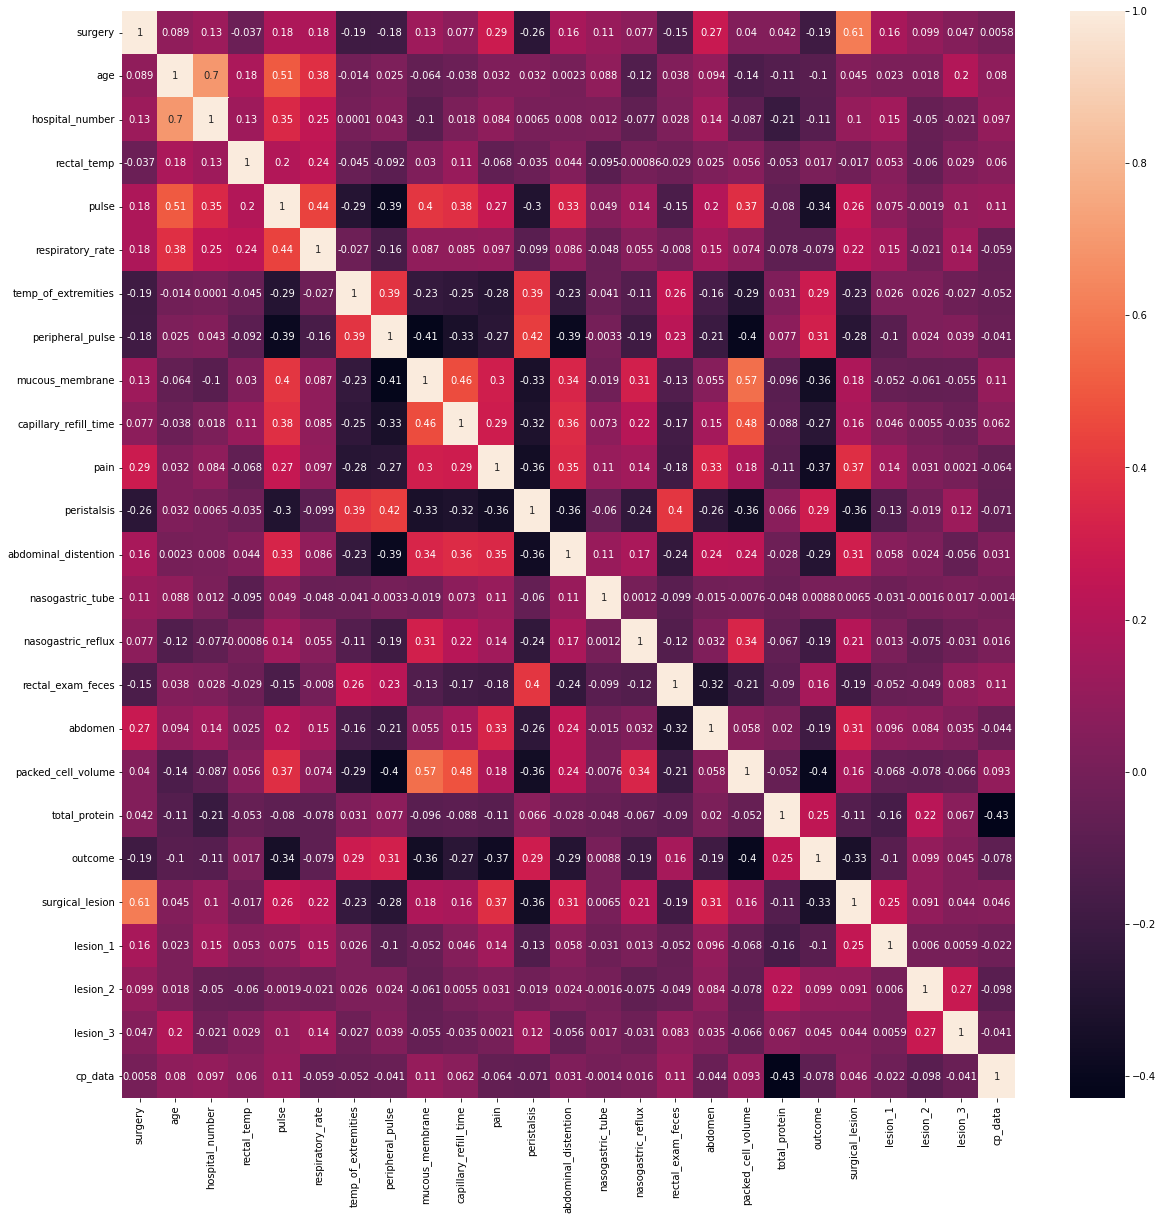

In [ ]:
# correlation matrix
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [ ]:
""" 
function acts like a pipeline for scaling 
and performing logistic regression along 
with printing the classification report
"""
def train_tasks(df, scale):
  # Creating Target and Input Data
  X=df.drop(['outcome'],axis=1)
  y=df['outcome']
  if scale:
    restore = X.columns
    scaler = StandardScaler()
    scaled = scaler.fit_transform(X)
    X = pd.DataFrame(scaled)
    X.columns = restore
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 22)
  X_train.shape, X_test.shape, y_train.shape, y_test.shape
  lr = LogisticRegression() #solver='newton-cg',max_iter=500
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  predicted_probas = lr.predict_proba(X_test)
  print(classification_report(y_test, y_pred))
  return y_pred, y_test, predicted_probas


In [ ]:
# Creating Target and Input Data
X=df.drop(['outcome'],axis=1)
y=df['outcome']

In [ ]:
# Splitting the data into train and test with test size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((209, 24), (90, 24), (209,), (90,))

In [ ]:
# instantializing logsitic regression model
lr = LogisticRegression() 

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# pritning classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.20      0.05      0.07        22
         1.0       0.00      0.00      0.00        13
         2.0       0.61      0.95      0.74        55

    accuracy                           0.59        90
   macro avg       0.27      0.33      0.27        90
weighted avg       0.42      0.59      0.47        90



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

**Tuning the model**

In [ ]:
for col in range(len(corr['outcome'])):
        if abs(corr['outcome'][col]) < 0.1:
            tuned_df = df.drop([corr.index[col]], axis=1)

In [ ]:
tuned_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,0.0,0.0,530101,38.5,66.0,28.0,1.0,1.0,0.0,2.0,4.0,0.0,3.0,1.0,0.0,1.0,4.0,45.0,8.4,0.0,0.0,11300,0,0
1,1.0,0.0,534817,39.2,88.0,20.0,1.0,2.0,3.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,50.0,85.0,1.0,0.0,2208,0,0
2,0.0,0.0,530334,38.3,40.0,24.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,33.0,6.7,2.0,0.0,0,0,0
3,1.0,1.0,5290409,39.1,164.0,84.0,0.0,2.0,5.0,2.0,1.0,0.0,3.0,0.0,1.0,1.0,4.0,48.0,7.2,0.0,1.0,2208,0,0
4,0.0,0.0,530255,37.3,104.0,35.0,1.0,2.0,5.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0,74.0,7.4,0.0,0.0,4300,0,0


In [ ]:
y_pred, y_test, predicted_probas = train_tasks(tuned_df,True)
# 0 - died
# 1 - euthanized
# 2 - lived

              precision    recall  f1-score   support

         0.0       0.72      0.59      0.65        22
         1.0       0.22      0.15      0.18        13
         2.0       0.71      0.82      0.76        55

    accuracy                           0.67        90
   macro avg       0.55      0.52      0.53        90
weighted avg       0.65      0.67      0.65        90



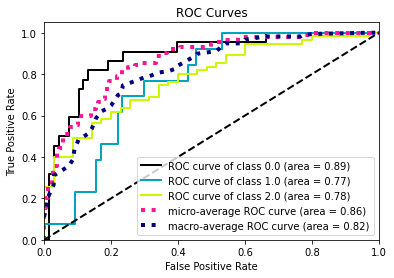

In [ ]:
# printing ROC curve
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

**Conclusion**: Through this experiment, I got a hands on experience of Linear Regression and Logistic Regression Problems. I understood the Data Exploration process in depth and its importance with respect to Data Science. I used the information from the exploration to tune my models better thereby achieveing a greater accuracy score.